In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

### 1. Загрузите файл HR.csv в pandas datafram

In [2]:
data = pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:  
1.satisfaction_level - Уровень удовлетворенности работой  
2.Last_evaluation - Время с момента последней оценки в годах  
3.number_projects - Количество проектов, выполненных за время работы  
4.average_monthly_hours - Среднее количество часов на рабочем месте в месяц  
5.time_spend_company - Стаж работы в компании в годах  
6.work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7.left - уволился ли сотрудник  
8.promotion_last_5years - повышался ли сотрудник за последние пять лет  
9.department - отдел в котором работает сотрудник  
10.salary - относительный уровень зарплаты

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
data.describe() #квартиль 50% и будет медианой

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.mode() # average_montly_hours две моды получилось, т.к. их (135, 156) одинаковое количество

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

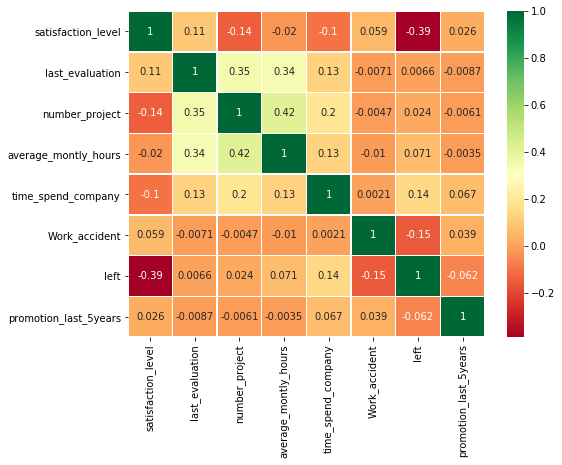

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

#### Две самые коррелируемые это average_montly_hours с number_project (0,42) и left с satisfaction_level (с обратной корреляцией -0,39).  
#### Две менее коррелируемые: Work_accident с time_spend_company (0,0021) и promotion_last_5years с average_montly_hours (-0,0035). 

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [8]:
print(f"Количество сотрудников")
print(data.groupby(['department'])['number_project'].count())
print(f"Всего {data['number_project'].count()}")

Количество сотрудников
department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: number_project, dtype: int64
Всего 14999


### 5. Показать распределение сотрудников по зарплатам.

In [9]:
data.groupby(['salary'])['number_project'].count()

salary
high      1237
low       7316
medium    6446
Name: number_project, dtype: int64

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [10]:
data.groupby(['department', 'salary'])['number_project'].count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: number_project, dtype: int64

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [11]:
low = data.loc[data['salary']=='low']['average_montly_hours']

high = data.loc[data['salary']=='high']['average_montly_hours']

stats.ttest_ind(low, high)

Ttest_indResult(statistic=0.7288680398062308, pvalue=0.4661023478267259)

#### t-критерий не превышает 1,95 по таблице и p-value превышает 0,05, поэтому опровергаем гипотезу о том, что сотрудники с высоким окладом проводят на работе больше времени.

In [12]:
data.loc[data['salary']=='low']['average_montly_hours'].mean()

200.9965828321487

In [13]:
data.loc[data['salary']=='high']['average_montly_hours'].mean()

199.86742118027485

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

#### 8.1. Доля сотрудников с повышением за последние 5 лет

In [14]:
share_current = data.loc[(data['left']==0)&(data['promotion_last_5years']==1)]['number_project'].count()/data.loc[(data['left']==0)]['number_project'].count()

print(f"Доля сотрудников с повышением за последние 5 лет среди неуволившихся {share_current}")

Доля сотрудников с повышением за последние 5 лет среди неуволившихся 0.026251312565628283


In [15]:
share_left = data.loc[(data['left']==1)&(data['promotion_last_5years']==1)]['number_project'].count()/data.loc[(data['left']==1)]['number_project'].count()

print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся {share_left}")

Доля сотрудников с повышением за последние 5 лет среди уволившихся 0.005320638476617194


#### 8.2. Средняя степень удовлетворенности.

In [16]:
print(f"Среди неуволившихся {data.loc[data['left']==0]['satisfaction_level'].mean()}")

Среди неуволившихся 0.666809590479516


In [17]:
print(f"Среди уволившихся {data.loc[data['left']==1]['satisfaction_level'].mean()}")

Среди уволившихся 0.44009801176140917


#### 8.3. Среднее количество проектов

In [18]:
print(f"Среди неуволившихся {data.loc[data['left']==0]['number_project'].mean()}")

Среди неуволившихся 3.786664333216661


In [19]:
print(f"Среди уволившихся {data.loc[data['left']==1]['number_project'].mean()}")

Среди уволившихся 3.8555026603192384


### 9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [20]:
del data['department']
del data['salary']

In [42]:
data_train, data_test = train_test_split(data, test_size=0.2)

In [43]:
y_train, y_test = data_train['left'], data_test['left']
# del data_train['left']
# del data_test['left']

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
lda.predict(data_test)

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [47]:
result

,0,1
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2995,1,0
2996,0,0
2997,0,0
2998,1,0


In [48]:
accuracy_score(y_test, lda.predict(data_test))

0.7646666666666667